Petgraph demos series - Kosaraju SCC

By Morpher

License: MIT

Written: 2025-12-01

In [2]:
:dep petgraph = "0.8.3"
:dep petgraph-evcxr = "*"
:dep hashbrown = "0.15"

In [3]:
extern crate petgraph;
use petgraph::prelude::*;
use petgraph::dot::Dot;
use petgraph::algo::kosaraju_scc;
use petgraph_evcxr::draw_graph;
use std::collections::HashMap;

In [4]:
:dep plotters = { version = "^0.3.6", default-features = false, features = ["evcxr", "all_series", "all_elements"] }
extern crate plotters;
use plotters::prelude::*;

Lets created directed graph

A -> B    F -> G -> J
^    |    ^    |
|    v    |    v
D <- C -> E <- H   


In [9]:
let mut graph = DiGraph::<&str, &str>::new();
let a = graph.add_node("A");
let b = graph.add_node("B");
let c = graph.add_node("C");
let d = graph.add_node("D");
let e = graph.add_node("E");
let f = graph.add_node("F");
let g = graph.add_node("G");
let h = graph.add_node("H");
let j = graph.add_node("J");



In [6]:
graph.add_edge(a, b, "->");
graph.add_edge(b, c, "->");
graph.add_edge(c, d, "->");
graph.add_edge(d, a, "->");
graph.add_edge(c, e, "->");
graph.add_edge(e, f, "->");
graph.add_edge(f, g, "->");
graph.add_edge(g, h, "->");
graph.add_edge(h, e, "->");
graph.add_edge(g, j, "->");

In [ ]:
Using  Kosaraju-Sharir's algorithm to find strongly connected components in directed graph

In [7]:
let scc = kosaraju_scc(&graph);
for component in scc {
    println!("{} Strongly connected components detected", component.len());
    let usernames: Vec<&str> = component
        .iter()
        .map(|&node_index| graph[node_index])
        .collect();
    println!("{:?}\n", usernames);
}

1 Strongly connected components detected
["J"]

4 Strongly connected components detected
["E", "F", "G", "H"]

4 Strongly connected components detected
["A", "B", "C", "D"]



()

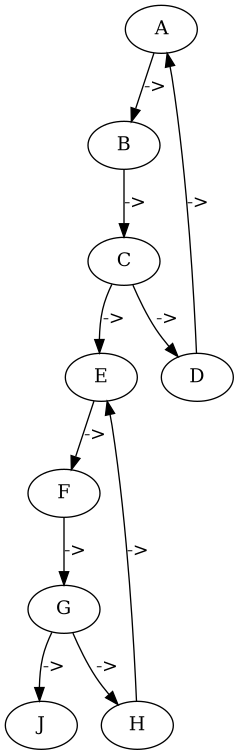

In [8]:
draw_graph(&graph);